### National Center for Health Statistics- Mortality cause.
###### SOURCES:
###### CDC/NCHS, National Vital Statistics System,
###### Mortality data (see http://www.cdc.gov/nchs/deaths.htm); and CDC WONDER (see http://wonder.cdc.gov).


> This study is aimed at finding the 10 leading causes of death in the United States from 1999 to 2107.
Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics.
Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. 
<a id="top page"><a/>


### Python Libraries Used:
* Pandas
* Matplotlib
* Seaborn
* Numpy

In [123]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [124]:
# Loading data from a csv file into a Pandas DataFrame.
data=pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")
data

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


### Some Basic Explorations.

In [125]:
# Generating a summary of our data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null int64
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [126]:
# Statistical summary
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


In [127]:
# Looking into the number of rows and columns.
data.shape

(10868, 6)

In [128]:
# Reading the (Headings) columns.
data.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [129]:
# Filtering and extracing rows having Cause Name as "All causes".
Dat=data.loc[data['113 Cause Name'].str.contains("All Causes")]
Dat

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
52,2017,All Causes,All causes,United States,2813503,731.9
53,2017,All Causes,All causes,Alabama,53238,917.7
54,2017,All Causes,All causes,Alaska,4411,708.8
55,2017,All Causes,All causes,Arizona,57758,678.5
56,2017,All Causes,All causes,Arkansas,32588,900.1
...,...,...,...,...,...,...
10395,1999,All Causes,All causes,Virginia,55320,889.6
10396,1999,All Causes,All causes,Washington,43865,815.1
10397,1999,All Causes,All causes,West Virginia,21049,1012.3
10398,1999,All Causes,All causes,Wisconsin,46672,831.5


In [130]:
# Droping off less useful columns.
data=data.drop(columns=["113 Cause Name"])
data

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035,16.9
10864,1999,Kidney disease,Washington,278,5.2
10865,1999,Kidney disease,West Virginia,345,16.4
10866,1999,Kidney disease,Wisconsin,677,11.9


In [131]:
# Extracing the data having the 10 least number of recoding Deaths form the entire data.
dat=data.sort_values("Deaths").head(10)
dat

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
9101,2002,Kidney disease,Alaska,21,6.8
3426,2012,Kidney disease,Vermont,21,2.6
10148,2000,Suicide,District of Columbia,23,3.8
7957,2004,Kidney disease,Alaska,23,7.1
9673,2001,Kidney disease,Alaska,24,7.2
10401,1999,Alzheimer's disease,Alaska,24,11.9
8529,2003,Kidney disease,Alaska,28,8.4
5000,2009,Suicide,District of Columbia,29,4.4
566,2017,Kidney disease,Vermont,29,3.3
10720,1999,Suicide,District of Columbia,30,5.1


In [132]:
# Filtering our data to exclude rows having State as United States.
# generating a new dataframe"Data"
Data=data[data["State"]!="United States"]
Data

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
5,2017,Unintentional injuries,California,13840,33.2
...,...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035,16.9
10864,1999,Kidney disease,Washington,278,5.2
10865,1999,Kidney disease,West Virginia,345,16.4
10866,1999,Kidney disease,Wisconsin,677,11.9


In [133]:
Data.shape

(10659, 5)

In [134]:
# Generating an array of all the years in our dataframe.
Data["Year"].unique()


array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999], dtype=int64)

In [135]:
# Generating an array of all the names of diseases in our dataframe.
Data["Cause Name"].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [136]:
Data=Data[Data["Cause Name"]!="All causes"]
Data

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
5,2017,Unintentional injuries,California,13840,33.2
...,...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035,16.9
10864,1999,Kidney disease,Washington,278,5.2
10865,1999,Kidney disease,West Virginia,345,16.4
10866,1999,Kidney disease,Wisconsin,677,11.9


In [137]:
Data["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [138]:
# Displaying dataset containing only categorical variables
categorical_Var= Data.select_dtypes("object")
categorical_Var

,Cause Name,State
1,Unintentional injuries,Alabama
2,Unintentional injuries,Alaska
3,Unintentional injuries,Arizona
4,Unintentional injuries,Arkansas
5,Unintentional injuries,California
...,...,...
10863,Kidney disease,Virginia
10864,Kidney disease,Washington
10865,Kidney disease,West Virginia
10866,Kidney disease,Wisconsin


In [139]:
# Displaying dataset containing only numerical variables
numeric_Var=Data.select_dtypes("number")
numeric_Var

,Year,Deaths,Age-adjusted Death Rate
1,2017,2703,53.8
2,2017,436,63.7
3,2017,4184,56.2
4,2017,1625,51.8
5,2017,13840,33.2
...,...,...,...
10863,1999,1035,16.9
10864,1999,278,5.2
10865,1999,345,16.4
10866,1999,677,11.9


In [140]:
# Extracting the dataset for the year 1999.
Z=Data[Data["Year"]==1999]
Z.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
10296,1999,Unintentional injuries,Alabama,2313,52.2
10297,1999,Unintentional injuries,Alaska,294,55.9
10298,1999,Unintentional injuries,Arizona,2214,44.8
10299,1999,Unintentional injuries,Arkansas,1287,47.6
10300,1999,Unintentional injuries,California,9198,28.7


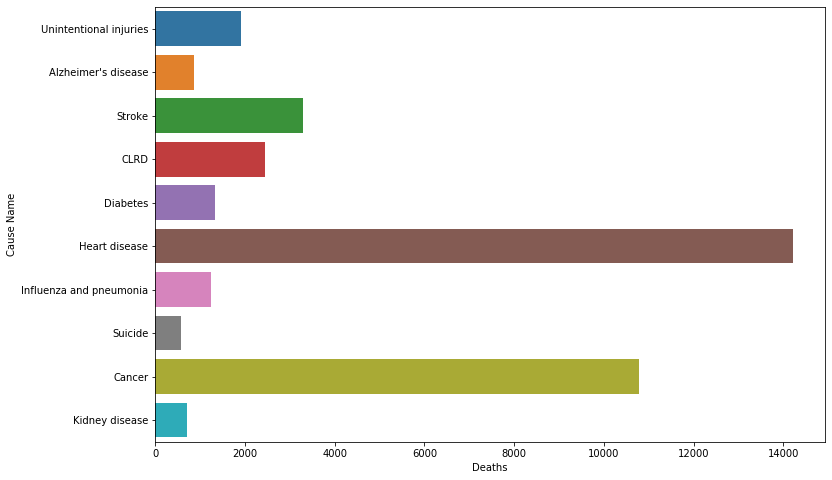

In [141]:
# Using a Bar plot to display the cuase of deaths in 1999.
# Z=Data[Data["Year"]==1999]
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(y="Cause Name",x="Deaths",data=Z,ci=None)
#Notes:

### Remark:
* Heart disease was the top cause of most deaths in 1999 followed by  Cancer, then Stroke.

### Line plot.
* Displaying the relationship between States and number of Deaths in 1999,using cause of the death as category.

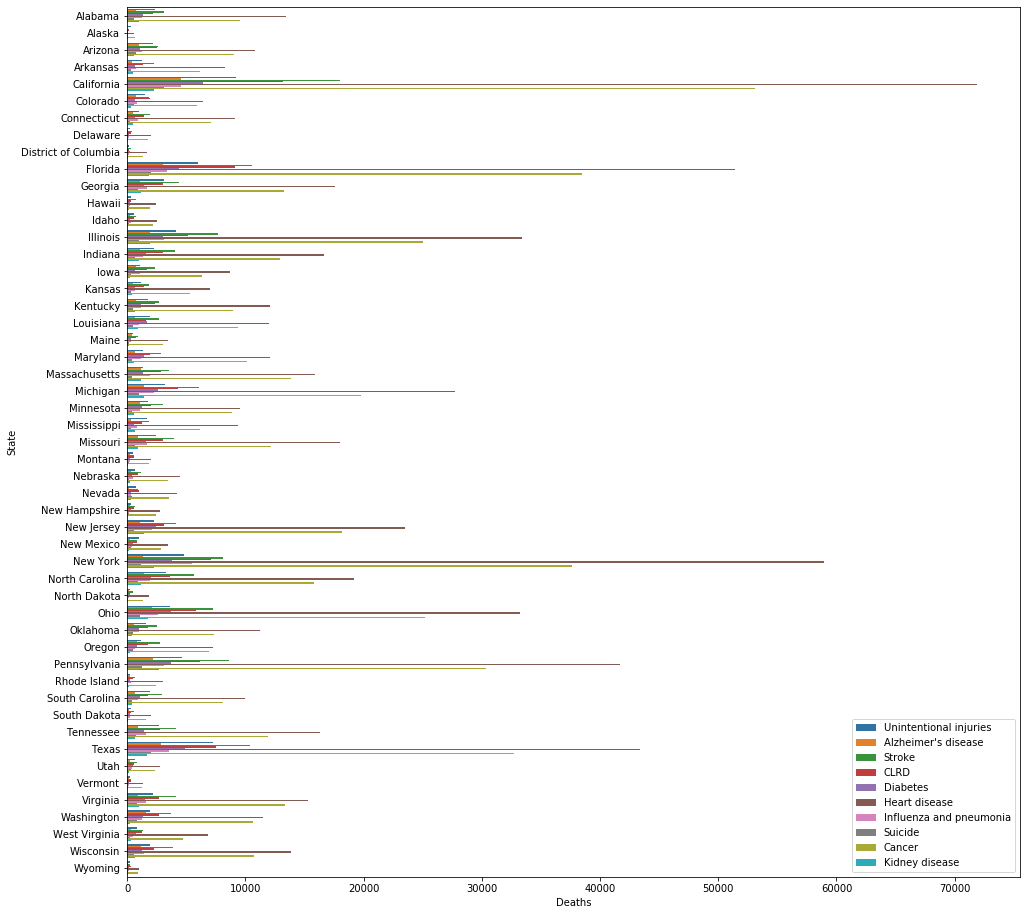

In [142]:
fig,ax=plt.subplots(figsize=(16,16))

ax=sns.barplot(y="State",x="Deaths",hue="Cause Name",data= Z)
ax.legend()


### Remarks:
#### 1). The three main leading causes of deaths in 1999 were Heart disease, Cancer  and Kidney disease respectively.
#### 2). The peaks represence leading states ( Califonia, New York, Florida, Texas, Pennsylvania, Ohio, Illinios) in decreasing order.

In [143]:
# Extracting the dataset for the year 2000.
X=Data[Data["Year"]==2000]
X.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
9724,2000,Unintentional injuries,Alabama,2093,47.0
9725,2000,Unintentional injuries,Alaska,343,64.5
9726,2000,Unintentional injuries,Arizona,2326,46.3
9727,2000,Unintentional injuries,Arkansas,1267,46.5
9728,2000,Unintentional injuries,California,8577,26.5


3744.1262125902995


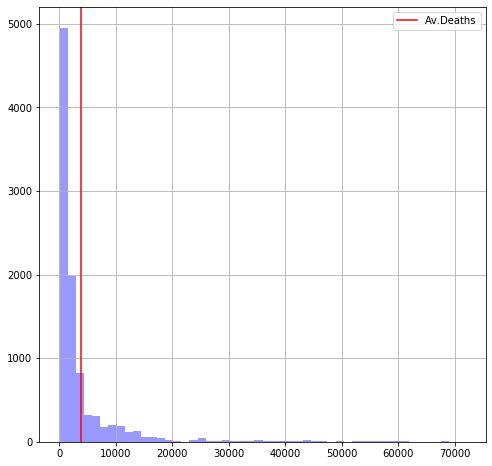

In [144]:
#Investigating the distribution of Deaths in the year 2000.
fig,ax=plt.subplots(figsize=(8,8))
death=Data["Deaths"].values
ax=sns.distplot(death,color="blue",kde=False)
#Calculating the mean
mean=(Data["Deaths"].mean())
print(mean)
#ploting the mean
plt.axvline(mean,color="red",label="Av.Deaths")
plt.legend()
plt.grid()

### Remark:
* It is a right(positive) skwed distribution as the mean is to the right of the distribution.
* Therefore the mean Death in the year 2000 in greater than the meadin Death value.

In [145]:
# Defining a new dataframe Data2 which constitude only top 1000 Deaths data.
Data2 =Data.sort_values("Deaths",ascending=False).head(1000)
Data

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
5,2017,Unintentional injuries,California,13840,33.2
...,...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035,16.9
10864,1999,Kidney disease,Washington,278,5.2
10865,1999,Kidney disease,West Virginia,345,16.4
10866,1999,Kidney disease,Wisconsin,677,11.9


20085.977


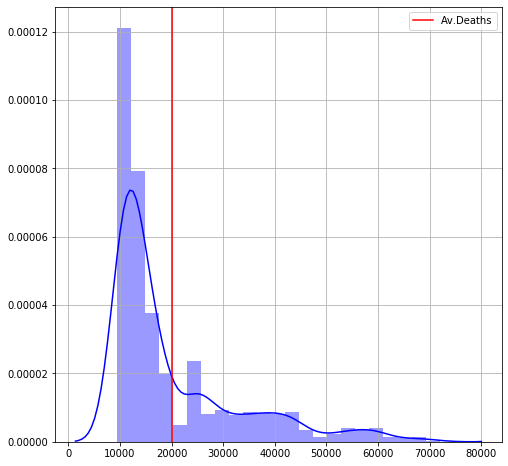

In [146]:
#Investigating the distribution of Deaths in the top 1000 Deaths.
fig,ax=plt.subplots(figsize=(8,8))
Deaths=Data2["Deaths"].values
ax=sns.distplot(Deaths,color="blue")
#Calculating the mean
mean=(Data2["Deaths"].mean())
print(mean)
#ploting the mean
plt.axvline(mean,color="red",label="Av.Deaths")
plt.legend()
plt.grid()

#### Remark:
* It is a right(positive) skwed distribution as the mean is to the right of the distribution.
* Therefore the mean Death in the top 1000 in greater than the meadin Death value.

In [147]:
state_cause=Data2["State"]
state_cause

10612        California
8324         California
8896         California
10040        California
9468         California
              ...      
8360     South Carolina
10764           Alabama
7349           Kentucky
3923          Minnesota
7081            Florida
Name: State, Length: 1000, dtype: object

In [148]:
state_cause.unique()

array(['California', 'New York', 'Florida', 'Texas', 'Pennsylvania',
       'Illinois', 'Ohio', 'Michigan', 'New Jersey', 'North Carolina',
       'Georgia', 'Missouri', 'Indiana', 'Tennessee', 'Massachusetts',
       'Virginia', 'Wisconsin', 'Alabama', 'Washington', 'Arizona',
       'Maryland', 'Kentucky', 'Louisiana', 'Oklahoma', 'South Carolina',
       'Minnesota'], dtype=object)

,Deaths
Year,
1999,1087510
2000,1068109
2001,1058575
2002,1066371
2003,1076091
2004,1025514
2005,1027459
2006,991314
2007,998341


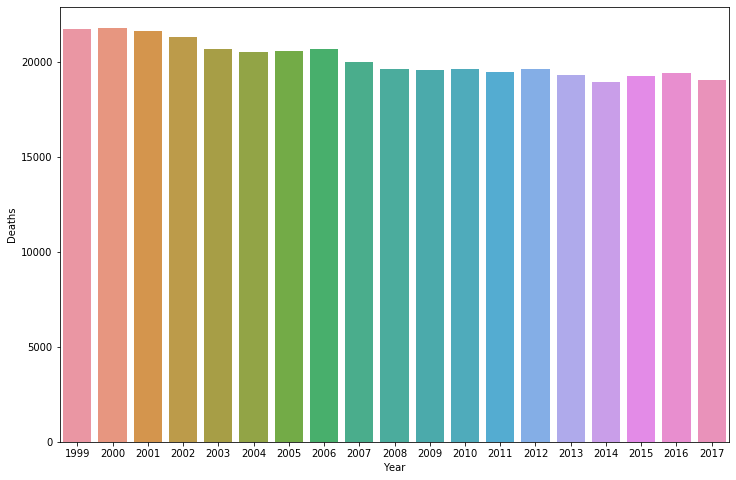

In [149]:
# Displaying a bar plot of total number of Deaths within the top 1000 Deaths recorded.
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(x="Year",y="Deaths",data=Data2,ci=None)
#Notes:
# The bars take the mean of the Revenue by default.
#create the sum of the Deaths of our data frame.
DP=Data2[["Deaths","Year"]].groupby("Year").agg({'Deaths':'sum'})
DP

### Remark:
* There is a gradual decrease in deaths as we move from 1999 to 2017.

In [150]:
word_cause.unique()

array(['Heart disease', 'Cancer', 'Stroke', "Alzheimer's disease", 'CLRD',
       'Unintentional injuries', 'Diabetes'], dtype=object)

In [151]:
# Using for loop to generate a Dic for diseases.
word_cont={}
for cause in word_cause:
    if cause in word_cont.keys():
        word_cont[cause]+=1
    else:
        word_cont[cause]=1
word_cont

{'Heart disease': 25,
 'Cancer': 25,
 'Stroke': 3,
 "Alzheimer's disease": 2,
 'CLRD': 3,
 'Unintentional injuries': 4,
 'Diabetes': 1}

In [152]:
word_cont.items()

dict_items([('Heart disease', 25), ('Cancer', 25), ('Stroke', 3), ("Alzheimer's disease", 2), ('CLRD', 3), ('Unintentional injuries', 4), ('Diabetes', 1)])

In [153]:
list(word_cont.items())[2]

('Stroke', 3)

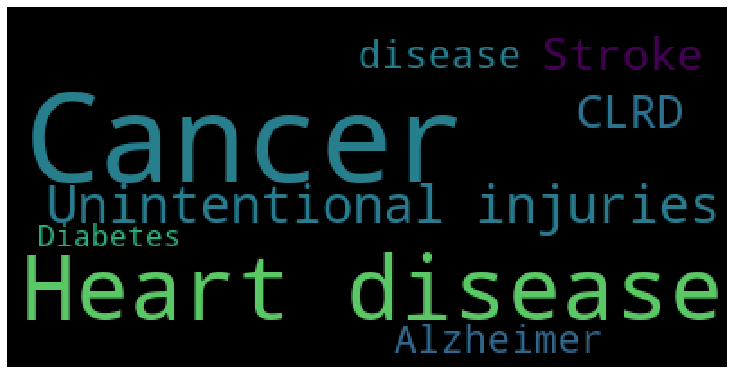

In [154]:
wcd=WordCloud()
text="\n".join(word_cause)
wcd.generate(text)

fig = plt.figure(figsize = (10,8))
plt.imshow(wcd)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [155]:
# Aggregating the sum of Deaths by grouping same States together.
df=Data2[["Deaths","State"]].groupby("State").agg({'Deaths':'sum'})
df.sample(5)

,Deaths
State,
Missouri,525919
New York,1620170
Florida,1908445
Washington,427793
Indiana,522579


ValueError: Could not interpret input 'State'

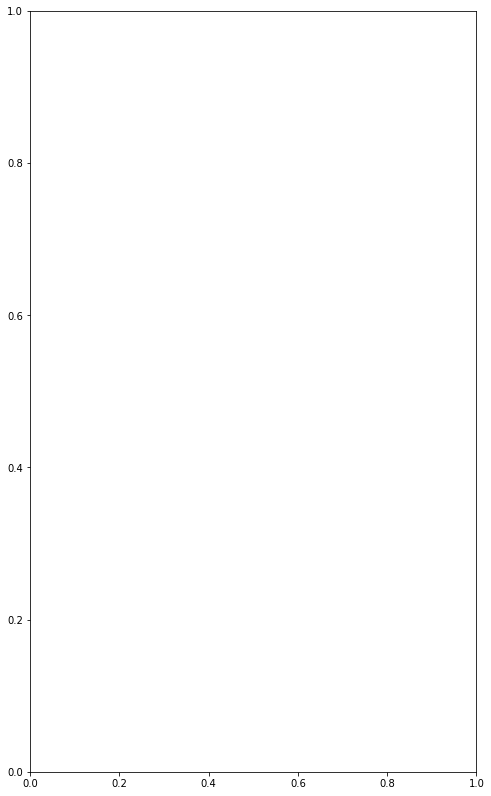

In [156]:
# Displaying a Bar Plot of the total Deaths by State for the top 1000 Deaths.
fig,ax=plt.subplots(figsize=(8,14))
ax=sns.barplot(x="Deaths",y="State",ci=None,data=df)

In [157]:
# Aggregating the sum of Deaths by grouping same Cause together.
Df=Data2[["Deaths","Cause Name"]].groupby("Cause Name").agg({'Deaths':'sum'})
Df.sample(5)

,Deaths
Cause Name,
Stroke,525139
CLRD,429242
Unintentional injuries,268777
Diabetes,9595
Cancer,8573847


In [158]:
# Genrating a word cloud for the cause of deaths in the top 1000 recorded deaths.
word_cause=Data2["Cause Name"]
word_cause

10612    Heart disease
8324     Heart disease
8896     Heart disease
10040    Heart disease
9468     Heart disease
             ...      
8360     Heart disease
10764           Cancer
7349            Cancer
3923            Cancer
7081              CLRD
Name: Cause Name, Length: 1000, dtype: object

In [159]:
state_cause=Data2["State"]
state_cause

10612        California
8324         California
8896         California
10040        California
9468         California
              ...      
8360     South Carolina
10764           Alabama
7349           Kentucky
3923          Minnesota
7081            Florida
Name: State, Length: 1000, dtype: object

In [160]:
state_cause.unique()

array(['California', 'New York', 'Florida', 'Texas', 'Pennsylvania',
       'Illinois', 'Ohio', 'Michigan', 'New Jersey', 'North Carolina',
       'Georgia', 'Missouri', 'Indiana', 'Tennessee', 'Massachusetts',
       'Virginia', 'Wisconsin', 'Alabama', 'Washington', 'Arizona',
       'Maryland', 'Kentucky', 'Louisiana', 'Oklahoma', 'South Carolina',
       'Minnesota'], dtype=object)

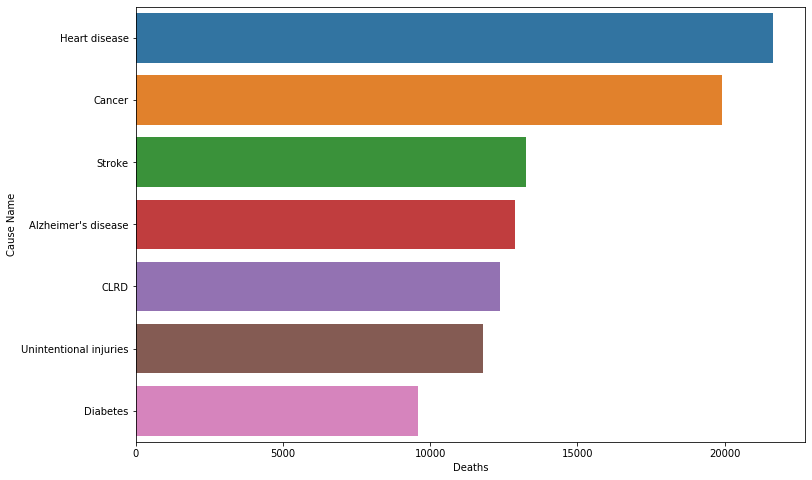

In [161]:
# Displaying a bar plot showing the cuase of deaths in 2017.
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(y="Cause Name",x="Deaths",data=A,ci=None)
#Notes:

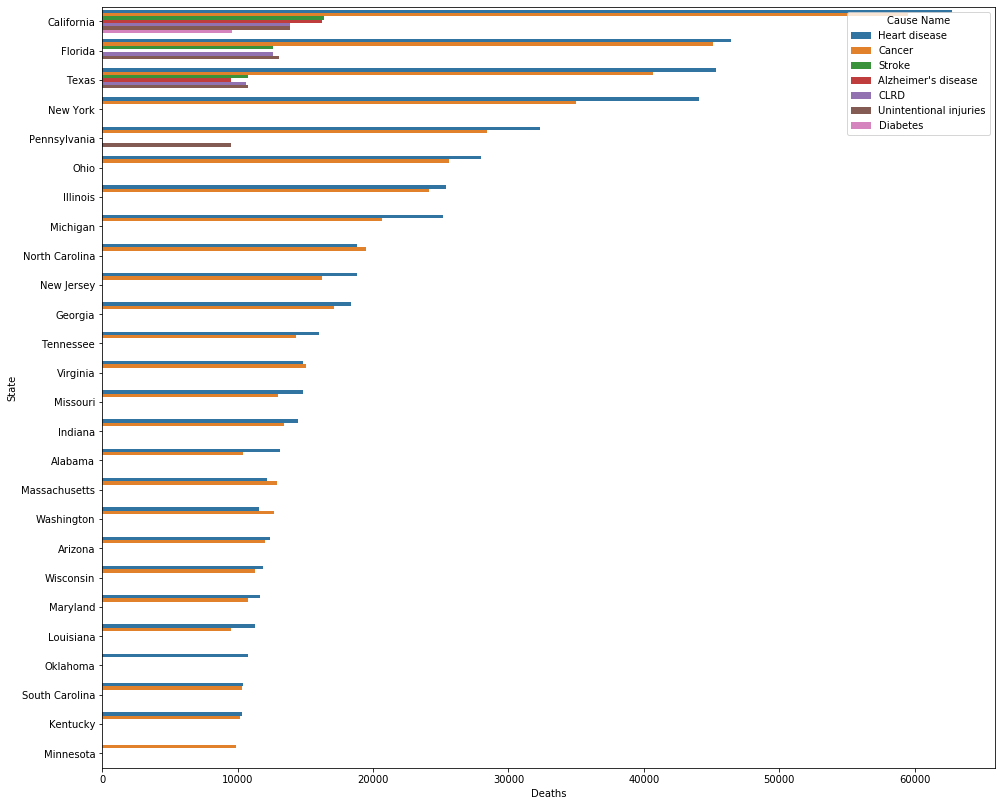

In [162]:
## Displaying a line plot showing the cuase of deaths in respective States in 2017
fig,ax=plt.subplots(figsize=(16,14))
ax=sns.barplot(y="State",x="Deaths",hue="Cause Name",data= A)

### Word Cloud.

In [163]:
# Creating a word cloud to show causes of deaths in 2017.
# A=Data2[Data2["Year"]==2017]
word_cause=A["Cause Name"]
word_cause

317             Heart disease
473                    Cancer
322             Heart disease
356             Heart disease
478                    Cancer
                ...          
492                    Cancer
265                  Diabetes
148       Alzheimer's disease
39     Unintentional injuries
487                    Cancer
Name: Cause Name, Length: 63, dtype: object

In [164]:
word_cause.unique()

array(['Heart disease', 'Cancer', 'Stroke', "Alzheimer's disease", 'CLRD',
       'Unintentional injuries', 'Diabetes'], dtype=object)

In [165]:
# Using a for loop to generate a Dic of diseases.
word_cont={}
for cause in word_cause:
    if cause in word_cont.keys():
        word_cont[cause]+=1
    else:
        word_cont[cause]=1
word_cont

{'Heart disease': 25,
 'Cancer': 25,
 'Stroke': 3,
 "Alzheimer's disease": 2,
 'CLRD': 3,
 'Unintentional injuries': 4,
 'Diabetes': 1}

In [166]:
word_cont.items()

dict_items([('Heart disease', 25), ('Cancer', 25), ('Stroke', 3), ("Alzheimer's disease", 2), ('CLRD', 3), ('Unintentional injuries', 4), ('Diabetes', 1)])

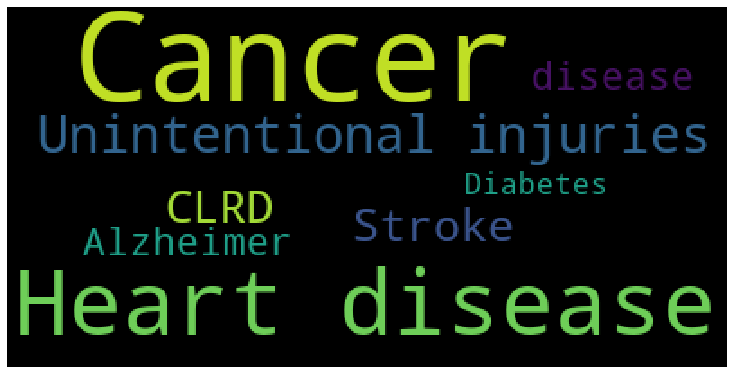

In [167]:
# Displaying word cloud for 2017 diseases.
wcd=WordCloud()
text="\n".join(word_cause)
wcd.generate(text)

fig = plt.figure(figsize = (10,8))
plt.imshow(wcd)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Remark:
* Cancer, Heart disease and Stroke are the leading cause of deaths from 1999 to 2017.